# Metropolis Hastings
El algoritmo de Metropolis-Hastings es un método de Monte Carlo Markov Chain (MCMC) que nos permite generar muestras de una distribución de probabilidad objetivo $\pi$ arbitraria, incluso cuando no podemos muestrear directamente de esa distribución usando una probabilidad de transición $Q(x,y)$. La idea del algoritmo es la siguiente

Iniciar la muestra con un valor arbitrario propuesto
- $ X_0 = x_0$

**Simulación de un nuevo estado**<br>
1. Dado $X_n =x$, se elige el salto potencial a un estado $Y_n$ con probabilidad de salto $Q(x,y)$ (un candidato para el siguiente valor de muestra $y$, dado el valor de muestra anterior $x$) simulamos
$$Y_n ∼Q(x,y)$$
**Calculo de la probabilidad de aceptación**
$$
 X_{n+1} = \begin{cases}
       y  &\quad\text{con probabilidad }\alpha(x,y)\\
       x  &\quad\text{con probabilidad }1-\alpha(x,y)\\
     \end{cases}
$$
donde
$$
α(x,y)=min \bigg\{1, \frac{π(y)Q(y,x)}{π(x)Q(x,y)}\bigg\}
$$

**Observación:** $α(x,y)∈[0,1]$<br>

$Q(x,y)$ un kernel de transición de probabilidad y puede haber diferentes propuestas del mismo. <br>

Consideresmos a nuestra distribución objetivo $\pi$ como una exponencial y la transición $Q$ como una caminata aleatoria.
$$\pi(x)=\exp(−x)\quad(x\geq0).$$

Observemos tambien que una caminata aleatoria tiene la siguiente caracteristica
$$
Q(x,y)=Q(y,x)
$$
Entonces
$$α(x,y)=min \bigg\{1, \frac{π(y)}{π(x)}\bigg\}$$

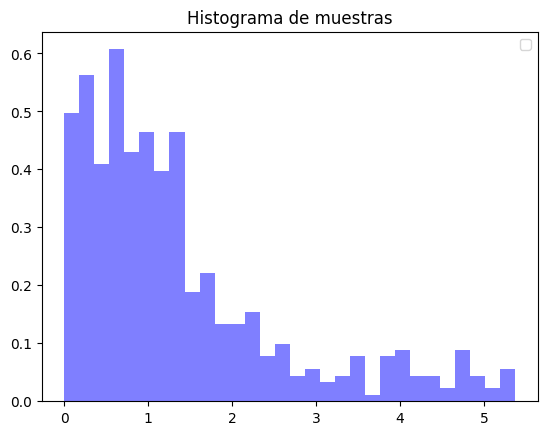

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función de densidad de probabilidad objetivo (exponencial)
def distribucion_objetivo(x):
    if x < 0:
        return 0
    else:
        return np.exp(-x)

# Propuesta Q: Caminata aleatoria
def propuesta_caminata_aleatoria(theta_actual):
    return theta_actual + np.random.normal(0, 1)

# Parámetros
num_muestras = 300
muestras = []

# Inicialización
theta_actual = 3
muestras_aceptadas = 0

# Iteraciones
while muestras_aceptadas < num_muestras:
    # Generar candidato propuesto
    propuesta = propuesta_caminata_aleatoria(theta_actual)

    # Calcular la razón de aceptación
    razon_aceptacion = min(1, distribucion_objetivo(propuesta) / distribucion_objetivo(theta_actual))

    # Aceptar o rechazar
    u = np.random.rand()
    if u < razon_aceptacion:
        theta_actual = propuesta
        muestras_aceptadas += 1

    muestras.append(theta_actual)

# Visualizar los resultados
plt.hist(muestras, bins=30, density=True, alpha=0.5, color='b')
x = np.linspace(0, max(muestras), 100)
plt.legend()
plt.title("Histograma de muestras")
plt.show()